In [1]:
#installing the transformers library
!pip install transformers

     |████████████████████████████████| 1.8MB 5.7MB/s 
     |████████████████████████████████| 890kB 52.3MB/s 
     |████████████████████████████████| 3.2MB 65.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=8acae3a89f00dcf19eabd67995555f14e11b17e0215b4fc56c725d455c16978a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
#importing the pretrained biobert tokenizer and the biobert model
from transformers import AutoTokenizer, TFAutoModel
biobert_tokenizer = AutoTokenizer.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

biobert_model = TFAutoModel.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at cambridgeltl/BioRedditBERT-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#displaying biobert model summary
biobert_model.summary()

Model: "tf_bert_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


**DataSet Creation**

In [ ]:
#loading the json medical data files
import json
with open('ehealthforumQAs.json') as f1:
  ehealth=json.load(f1)["data"]
with open('icliniqQAs.json') as f2:
  icliniq=json.load(f2)["data"]
with open('questionDoctorQAs.json') as f3:
  questiondoctor=json.load(f3)["data"]
with open('webmdQAs.json') as f4:
  webmd=json.load(f4)["data"]

In [ ]:
#function to extract question,answer and tags from the json objects
def extract_answer_question_tags(json_data):
  questions=[]
  answers=[]
  tags=[]
  for i in json_data:
    questions.append(i['question'])
    answers.append(i['answer'])
    tags.append(i['tags'])
  return questions,answers,tags

In [ ]:
#extracting the question,answer and tags from the medical json objects
all_questions=[]
all_answers=[]
all_tags=[]
for i in [ehealth,icliniq,questiondoctor,webmd]:
  questions,answers,tags=extract_answer_question_tags(i)
  all_questions.extend(questions)
  all_answers.extend(answers)
  all_tags.extend(tags)
print(len(all_questions),len(all_answers),len(all_tags))

29752 29752 29752


In [ ]:
#loading and storing the medical data into dataframe and csv file correspondingly.
import pandas as pd
all_data=pd.DataFrame({'questions':all_questions,'answers':all_answers,'tags':all_tags})
all_data.to_csv('all_data.csv',index=False)

In [ ]:
#loading medical data from the disk
all_data=pd.read_csv('all_data.csv')

In [ ]:
#displaying the medical data.
all_data

,questions,answers,tags
0,how do i stop smoking now,stopping smoking is about will power and being...,"['addiction', 'stop smoking']"
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"['pregnancy', 'diet', 'endometriosis']"
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"['breast cancer', 'cancer', 'breasts']"
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"['hair loss', 'diet', 'acne', 'ovulation and o..."
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"['am i pregnant', 'pregnant', 'urine pregnancy..."
...,...,...,...
29747,how can accidental of acetaminophen overdose b...,to avoid unintentional overdoses among adults ...,"['drug overdose', 'acetaminophen']"
29748,what should i do if i take an overdose of maxalt?,if you take more medication than you have been...,['drug overdose']
29749,what do i do in case of an overdose of relpax?,call your doctor or poison control center or g...,['drug overdose']
29750,is overdose with acetaminophen usually acciden...,in the u. s. suicide attempts account for over...,"['drug overdose', 'acetaminophen']"


In [ ]:
import re
import numpy as np
#function to preprocess tags post loading from disk
def preprocess_tags(tags):
  tags=tags[1:-1]
  tags=tags.replace("\'",'')
  return np.array(tags.split(', '))

In [ ]:
#preprocessing the tags post loading from disk
all_data['tags']=all_data.tags.apply(lambda x: preprocess_tags(x))

In [ ]:
#displaying the data
all_data.head()

,questions,answers,tags
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]"
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]"
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]"
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]"
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test..."


In [ ]:
import re
#preprocessing questions and answers.
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def preprocess(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text


all_data['preprocessed_question'] = all_data['questions'].apply(preprocess)
all_data['preprocessed_answer'] = all_data['answers'].apply(preprocess)
all_data.head()

,questions,answers,tags,preprocessed_question,preprocessed_answer
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",how do i stop smoking now,stopping smoking is about will power and being...
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]",hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test...",i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...


In [ ]:
#finding the lens of preprocessed questions and answers
all_data['question_len']=all_data['preprocessed_question'].apply(lambda x: len(x.split(' ')))
all_data['answer_len']=all_data['preprocessed_answer'].apply(lambda x: len(x.split(' ')))

In [ ]:
#printing different percentiles of question and answer lengths
import numpy as np
for i in range(0,101,10):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

0 2.0 1.0
10 7.0 21.0
20 9.0 31.0
30 12.0 40.0
40 14.0 50.0
50 18.0 61.0
60 22.0 77.0
70 38.0 99.0
80 63.0 134.0
90 96.0 201.0
100 425.0 1333.0


In [ ]:
#printing different percentiles of question and answer lengths
for i in range(90,101,1):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

90 96.0 201.0
91 99.0 211.0
92 102.0 223.0
93 104.43000000000029 236.0
94 107.0 254.0
95 109.0 275.0
96 112.0 301.0
97 115.0 343.0
98 119.0 397.0
99 124.0 495.0
100 425.0 1333.0


In [ ]:
#since more than 100% percent of questions and about 99% of all answers lie within 500 words, we use 500 as the max length
all_data['short_question']=all_data.apply(lambda x: ' '.join(x.preprocessed_question.split(' ')[:500]) if x.question_len>500 else x.preprocessed_question ,axis=1)
all_data['short_answer']=all_data.apply(lambda x: ' '.join(x.preprocessed_answer.split(' ')[:500]) if x.answer_len>500 else x.preprocessed_answer ,axis=1)

In [ ]:
#displaying the data post truncating the question and answers to length of 500
all_data.head(5)

,questions,answers,tags,preprocessed_question,preprocessed_answer,question_len,answer_len,short_question,short_answer
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",how do i stop smoking now,stopping smoking is about will power and being...,6,38,how do i stop smoking now,stopping smoking is about will power and being...
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,58,70,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,12,77,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]",hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...,196,97,hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test...",i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...,63,80,i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...


In [ ]:
#preparing the positive label dataset by taking the original question and original answer
all_dataset=all_data[['short_question','short_answer','tags']].copy()
all_dataset['label']=1.0

In [ ]:
#displaying the positive labelled dataset
all_dataset.head(3)

,short_question,short_answer,tags,label
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",1.0
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",1.0
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",1.0


In [ ]:
#function to extract the negative samples using tags
def extract_negative_samples(question,tags):
  stop=False
  while (not stop):
    sample_row= all_dataset.sample()
    sample_tags=sample_row.tags.values[0]
    inter_tags=set(tags[0]).intersection(set(sample_tags))
    if len(inter_tags)==0:
      stop=True
  return sample_row





In [ ]:
#preparing the negative labelled dataset
from tqdm.notebook import tqdm
tqdm.pandas()
negative_labels=all_dataset.progress_apply(lambda x: pd.Series([x.short_question,extract_negative_samples(x.short_question,x.tags).short_answer.values[0],x.tags]),axis=1)
negative_labels['label']=-1.0
negative_labels.columns=['short_question','short_answer','tags','label']

In [ ]:
#displaying the negative labelled dataset
negative_labels

,short_question,short_answer,tags,label
0,how do i stop smoking now,although you are young for saying that but it ...,"[addiction, stop smoking]",-1.0
1,i had a tubaligation 4 years ago and also have...,no you will not get tss from a piece of condom...,"[pregnancy, diet, endometriosis]",-1.0
2,could extra caffeine consumption be a cause of...,bleeding from the fractured bone and surroundi...,"[breast cancer, cancer, breasts]",-1.0
3,hello i am a 24 year old female 54 & 115 lb &...,in the u s using a deodorant is usually standa...,"[hair loss, diet, acne, ovulation and ovaries]",-1.0
4,i was wanting to know if you could tell me if ...,you have to drink water water has lots of amaz...,"[am i pregnant, pregnant, urine pregnancy test...",-1.0
...,...,...,...,...
29747,how can accidental of acetaminophen overdose b...,i had the same thing it went away soon after i...,"[drug overdose, acetaminophen]",-1.0
29748,what should i do if i take an overdose of maxalt,let me add that having one kidney is not a pro...,[drug overdose],-1.0
29749,what do i do in case of an overdose of relpax,you could be getting strep throat but normally...,[drug overdose],-1.0
29750,is overdose with acetaminophen usually acciden...,no you would be trying to replace on addiction...,"[drug overdose, acetaminophen]",-1.0


In [ ]:
#concatenating the positive and negative labelled dataset to get the final labelled dataset.
all_data_with_labels=pd.concat([all_dataset,negative_labels],axis=0)
all_data_with_labels.shape

(59504, 4)

In [ ]:
#splitting the data into train and validation
from sklearn.model_selection import train_test_split
train, validation = train_test_split(all_data_with_labels, test_size=0.2,random_state=42,shuffle=True,stratify=all_data_with_labels.label)

In [ ]:
#saving train and validation data to disk
train.to_csv('train_data_chatbot.csv',index=False)
validation.to_csv('validation_data_chatbot.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/chatbot'

/content/drive/My Drive/chatbot


In [ ]:
#loading train and validation data from disk
import pandas as pd
train=pd.read_csv('train_data_chatbot.csv')
validation=pd.read_csv('validation_data_chatbot.csv')

In [ ]:
#displaying the train label counts
train.label.value_counts()

 1.0    23802
-1.0    23801
Name: label, dtype: int64

In [ ]:
#displaying the validation label counts
validation.label.value_counts()

-1.0    5951
 1.0    5950
Name: label, dtype: int64

In [ ]:
#displaying the train dataset
train.head(5)

,short_question,short_answer,tags,label
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0
3,can i transmit genital warts seventeen years a...,it is important to look closely at each plan i...,['wart'],-1.0
4,is all vitamin d the same,migraine or sinusitis…,['vitamin d'],-1.0


In [ ]:
#extracting the short answers and questions from the train data
questions=train['short_question']
answers=train['short_answer']
labels=train['label']

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#Setting Max_length to be 512 as discussed above
MAX_LENGTH = 512
import tensorflow as tf


# Tokenize, filter and pad sentences
def tokenize_and_filter(questions, answers):
  tokenized_questions, tokenized_answers = [], []
  
  for (question, answer) in zip(questions, answers):
    # generating sequences
    tokenized_question =  biobert_tokenizer.encode(question)
    tokenized_answer = biobert_tokenizer.encode(answer)
    tokenized_questions.append(tokenized_question)
    tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=MAX_LENGTH, padding='post')
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_questions, tokenized_answers

#tokenizing and padding the train questions and answers
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
#preparing the question mask and the answer mask of the train dataset
train_question_mask=[[1 if token!=0 else 0 for token in question] for question in questions]
train_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in answers]

In [ ]:
#extracting the short answers and questions from the validation data
val_questions=validation['short_question']
val_answers=validation['short_answer']
val_labels=validation['label']

In [ ]:
#tokenizing and padding the validation question and answers
val_questions, val_answers = tokenize_and_filter(val_questions, val_answers)

In [ ]:
#preparing the question and answer mask for the validation data
val_question_mask=[[1 if token!=0 else 0 for token in question] for question in val_questions]
val_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in val_answers]

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the training  dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': questions,
        'answer': answers,
        'question_mask':train_question_mask,
        'answer_mask':train_answer_mask
    },
    {
        'label': labels.values
    },
))

# dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the validation dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': val_questions,
        'answer': val_answers,
        'question_mask':val_question_mask,
        'answer_mask':val_answer_mask
    },
    {
        'label': val_labels.values
    },
))

val_dataset = val_dataset.cache()
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE,drop_remainder=True)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [3]:
#creating the ffn layer 
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate,Conv1D,MaxPool1D,Dropout
class FFN(tf.keras.layers.Layer):
    def __init__(
            self,
            name='FFN',
            **kwargs):
        """Simple Dense wrapped with various layers
        """

        super(FFN, self).__init__(name=name, **kwargs)
        self.dropout = 0.2
        self.ffn_layer = tf.keras.layers.Dense(
            units=768,
            activation='relu',
            kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')
        

    def call(self, inputs):
        ffn_embedding = self.ffn_layer(inputs)
        ffn_embedding = tf.keras.layers.Dropout(
            self.dropout)(ffn_embedding)
        ffn_embedding += inputs
        return ffn_embedding

In [ ]:
#displaying the biobert model summary
biobert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [4]:
#creating the medicalbert model
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
class MedicalQAModelwithBert(tf.keras.Model):
    def __init__(
            self,
            trainable=False,
            name=''):
        super(MedicalQAModelwithBert, self).__init__(name=name)

        self.q_ffn_layer = FFN(name='q_ffn')
        self.a_ffn_layer = FFN(name='a_ffn')
        self.biobert_model=biobert_model
        self.biobert_model.trainable=trainable
        self.cos=tf.keras.layers.Dot(axes=1,normalize=True)

    def call(self, inputs):
      question_embeddings=self.biobert_model(input_ids=inputs['question'],attention_mask=inputs['question_mask']).pooler_output
      answer_embeddings=self.biobert_model(input_ids=inputs['answer'],attention_mask=inputs['answer_mask']).pooler_output
      q_ffnn=self.q_ffn_layer(question_embeddings)
      a_ffnn=self.a_ffn_layer(answer_embeddings)
      output=self.cos([q_ffnn,a_ffnn])
      return {"label":output}

In [ ]:
#defining custom callback
class custom_callback(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'acc': []}

  def on_epoch_end(self, epoch, logs={}):
        self.history['acc'].append(logs.get('custom_metric_acc'))
  


        #saving the model if validation accuracy increased from previous epoch
        if  (epoch==0) or (logs.get('custom_metric_acc')>self.history['acc'][epoch-1]):
          self.model.save_weights('medical_bert_re'+str(epoch)+'/medic'+str(epoch)+'_'+str(logs.get('custom_metric_acc')))


        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the training if weights is nan or loss is nan or inf
        if (np.array(is_nan_values).any() or (tf.math.is_nan(logs.get('loss'))) or (np.isinf(logs.get('loss')))):
          self.model.stop_training = True

        
        
      
        
 

In [ ]:
#defining the custom metric
batch_size=2
def custom_metric_acc(y_true,y_pred):
  y_true=tf.reshape(y_true,[tf.constant(batch_size)])
  y_pred=tf.reshape(y_pred,[tf.constant(batch_size)])
  c=tf.constant(0,dtype='float32')
  d=tf.cast(tf.math.greater_equal(y_true,c),dtype='float32')
  e=tf.cast(tf.math.greater_equal(y_pred,c),dtype='float32')
  f=tf.cast(tf.math.equal(d,e),dtype='float32')
  g=tf.reduce_sum(f)
  h=tf.cast(tf.shape(f),dtype='float32')
  i=g/h
  return i

In [ ]:
#compiling and training the medical qa model
import tensorflow.keras.backend as K
K.set_floatx('float32')
learning_rate=5e-6
num_epochs=5
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

epochs = num_epochs

medical_qa_model.fit(dataset,validation_data=val_dataset,epochs=epochs,callbacks=[custom_callback()])
medical_qa_model.summary()

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Epoch 1/5


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


23801/23801 [==============================] - ETA: 0s - loss: 0.6119 - custom_metric_acc: 0.7737

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


23801/23801 [==============================] - 7862s 327ms/step - loss: 0.6119 - custom_metric_acc: 0.7737 - val_loss: 0.5745 - val_custom_metric_acc: 0.8136
Epoch 2/5
23801/23801 [==============================] - 7781s 327ms/step - loss: 0.5128 - custom_metric_acc: 0.8611 - val_loss: 0.5595 - val_custom_metric_acc: 0.8380
Epoch 3/5
23801/23801 [==============================] - 7784s 327ms/step - loss: 0.4518 - custom_metric_acc: 0.9020 - val_loss: 0.5779 - val_custom_metric_acc: 0.8239
Epoch 4/5
23801/23801 [==============================] - 7785s 327ms/step - loss: 0.4042 - custom_metric_acc: 0.9204 - val_loss: 0.5885 - val_custom_metric_acc: 0.8187
Epoch 5/5
 3040/23801 [==>...........................] - ETA: 1:44:55 - loss: 0.3494 - custom_metric_acc: 0.9488

**Evaluating the model with the best train accuracy**




In [ ]:
import tensorflow.keras.backend as K
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.load_weights('./medical_bert_re3/medic3_0.9177975654602051')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

# original_labels=[]
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fd0733ef2a0> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fd0733ef2a0> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points
def acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and val_labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and val_labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [ ]:
#function to print the best accuracy and the threshold at which it is occuring
def best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
#find best threshold and accuracy of the model with best train accuracy on validation data
best_threshold_acc(predicted_labels)

accuracy for threshold -1.0 is 0.4999579867238047
accuracy for threshold -0.9 is 0.4999579867238047
accuracy for threshold -0.8 is 0.5001260398285858
accuracy for threshold -0.7000000000000001 is 0.5029829426098648
accuracy for threshold -0.6000000000000001 is 0.514074447525418
accuracy for threshold -0.5 is 0.542979581547769
accuracy for threshold -0.4 is 0.5984371061255357
accuracy for threshold -0.30000000000000004 is 0.65960843626586
accuracy for threshold -0.2 is 0.7234686160826821
accuracy for threshold -0.1 is 0.7790101672128392
accuracy for threshold 0.0 is 0.8185866733887909
accuracy for threshold 0.1 is 0.845391143601378
accuracy for threshold 0.2 is 0.8606839761364591
accuracy for threshold 0.30000000000000004 is 0.8583312326695236
accuracy for threshold 0.4 is 0.8383329132005714
accuracy for threshold 0.5 is 0.8011931770439459
accuracy for threshold 0.6000000000000001 is 0.7006974203848416
accuracy for threshold 0.7000000000000001 is 0.5449962188051424
accuracy for threshol

accuracy for threshold 0.2 is 0.8606839761364591


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


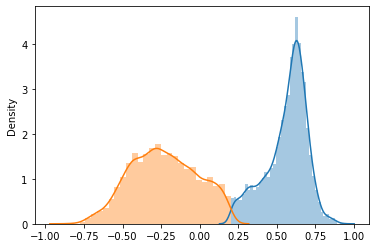

In [ ]:
#displaying the pdf of correctly predicted positive and negative points
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.2)
sns.distplot(correct_pred_pos)
sns.distplot(correct_pred_neg)

**Evaluating the model with best validation accuracy**


In [ ]:
#evaluating the model on validation data
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=False)
medical_qa_model.load_weights('./medical_bert_re1/medic1_0.8643124103546143')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f51bb2c42a0> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f51bb2c42a0> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf

In [ ]:
#finding the best accuracy and the corresponding threshold of the model of best validation accuracy
best_threshold_acc(predicted_labels)

accuracy for threshold -1.0 is 0.4999579867238047
accuracy for threshold -0.9 is 0.4999579867238047
accuracy for threshold -0.8 is 0.4999579867238047
accuracy for threshold -0.7000000000000001 is 0.5008822788001008
accuracy for threshold -0.6000000000000001 is 0.5060919250483152
accuracy for threshold -0.5 is 0.5318040500798252
accuracy for threshold -0.4 is 0.5820519284093774
accuracy for threshold -0.30000000000000004 is 0.6506175951600706
accuracy for threshold -0.2 is 0.7279220233593816
accuracy for threshold -0.1 is 0.7923703890429376
accuracy for threshold 0.0 is 0.8386690194101336
accuracy for threshold 0.1 is 0.8675741534324847
accuracy for threshold 0.2 is 0.8825308797580035
accuracy for threshold 0.30000000000000004 is 0.8852197294345013
accuracy for threshold 0.4 is 0.8705150827661541
accuracy for threshold 0.5 is 0.8350558776573397
accuracy for threshold 0.6000000000000001 is 0.7401899000084027
accuracy for threshold 0.7000000000000001 is 0.5780186538946307
accuracy for thr

In [ ]:
train_predicted_labels=[]
for i in tqdm(range(len(questions))):
  train_predicted_labels.append(medical_qa_model.predict({'question':np.array([questions[i]]),'question_mask':np.array([train_question_mask[i]]),
                             'answer':np.array([answers[i]]),'answer_mask':np.array([train_answer_mask[i]])})['label'][0][0])


In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points for train data
def train_acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [ ]:
#function to print the best accuracy and the threshold at which it is occuring for train points
def train_best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(train_acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
train_best_threshold_acc(train_predicted_labels)

accuracy for threshold -1.0 is 0.5000105035396929
accuracy for threshold -0.9 is 0.5000105035396929
accuracy for threshold -0.8 is 0.5000735247778502
accuracy for threshold -0.7000000000000001 is 0.5016490557317816
accuracy for threshold -0.6000000000000001 is 0.5125307228536017
accuracy for threshold -0.5 is 0.5525912232422326
accuracy for threshold -0.4 is 0.6247085267735227
accuracy for threshold -0.30000000000000004 is 0.7173497468646934
accuracy for threshold -0.2 is 0.807281053715102
accuracy for threshold -0.1 is 0.8768354935613302
accuracy for threshold 0.0 is 0.9200260487784383
accuracy for threshold 0.1 is 0.9439741192781967
accuracy for threshold 0.2 is 0.9555910341785182
accuracy for threshold 0.30000000000000004 is 0.9585950465306808
accuracy for threshold 0.4 is 0.9496460307123501
accuracy for threshold 0.5 is 0.917505199252148
accuracy for threshold 0.6000000000000001 is 0.8139823120391572
accuracy for threshold 0.7000000000000001 is 0.6129235552381153
accuracy for thres

accuracy for threshold 0.3 is 0.8852197294345013


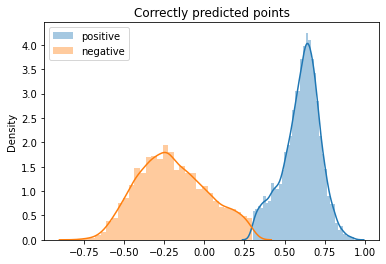

In [ ]:
#plotting the pdf of correctly predicted positive and negative points
import matplotlib.pyplot as plt
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.3)
sns.distplot(correct_pred_pos,label='positive')
sns.distplot(correct_pred_neg,label='negative')
plt.title('Correctly predicted points')
plt.legend()
plt.show()


In [ ]:
#finding incorrectly predicted positive and negative points
incorrect_pos=[]
incorrect_neg=[]
for i in range(len(val_labels)):
  if val_labels[i]==1 and predicted_labels[i]<0.3:
    incorrect_pos.append(predicted_labels[i])
  elif val_labels[i]==-1 and predicted_labels[i]>=0.3:
    incorrect_neg.append(predicted_labels[i])

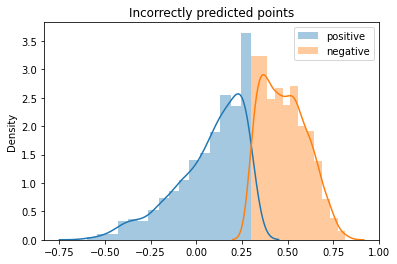

In [ ]:
#plotting the pdf of model predicted similarities for incorrectly predicted positive and negative points
sns.distplot(incorrect_pos,label='positive')
sns.distplot(incorrect_neg,label='negative')
plt.title('Incorrectly predicted points')
plt.legend()
plt.show()

**Observation from Plots**

From the above plots we can observe that most of the correctly classified points are well seperated and  even though accuracy is about 89% on validation data, most of the misclassified points lie within the threshold of 0.3

Since we got the best train and validation accuracy using this model, we will use this model to extract the question and answer embeddings

**Embedding extraction using the model**

In [9]:
#loading the trained medical bert model from above checkpoint
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.load_weights('./medical_bert_re1/medic1_0.8643124103546143')

In [12]:
#defining the question extractor model
x1=tf.keras.layers.Input((512),name='question',dtype='int64')
x2=tf.keras.layers.Input((512),name='question_mask',dtype='int64')
q_embed=medical_qa_model.get_layer('q_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
question_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=q_embed)

In [ ]:
#saving the question extractor model to disk
question_extractor_model.save('question_extractor_model_2_11')

In [13]:
#loading the question extractor model from disk
question_extractor_model=tf.keras.models.load_model('question_extractor_model_2_11')

In [14]:
#function to extract embeddings given a question and a question mask
def question_extractor(sam_dict):
  q_embed=question_extractor_model({'question':sam_dict['question'],'question_mask':sam_dict['question_mask']})
  return q_embed
  

In [17]:
#defining function to extract question embeddings given question
def extract_question_embed(question):
  max_length=512
  tokenized_questions=[]
  tokenized_question =  biobert_tokenizer.encode(question)
  tokenized_questions.append(tokenized_question)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_questions]
  return question_extractor({'question':np.array(tokenized_questions),'question_mask':np.array(attention_mask)})

In [20]:
#defining the answer extractor model
x1=tf.keras.layers.Input((512),name='answer',dtype='int64')
x2=tf.keras.layers.Input((512),name='answer_mask',dtype='int64')
a_embed=medical_qa_model.get_layer('a_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
answer_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=a_embed)

In [22]:
#saving the answer extractor model to disk
answer_extractor_model.save('answer_extractor_model_2_13')

INFO:tensorflow:Assets written to: answer_extractor_model_2_13/assets


INFO:tensorflow:Assets written to: answer_extractor_model_2_13/assets


In [23]:
#loading the answer extractor model from disk
answer_extractor_model=tf.keras.models.load_model('answer_extractor_model_2_13')

In [24]:
#function to extract embeddings given an answer and an answer mask
def answer_extractor(sam_dict):
  a_embed=answer_extractor_model({'answer':sam_dict['answer'],'answer_mask':sam_dict['answer_mask']})
  return a_embed
  

In [27]:
#defining function to extract answer embeddings
def extract_answer_embed(answer):
  max_length=512
  tokenized_answers=[]
  tokenized_answer =  biobert_tokenizer.encode(answer)
  tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_answers]
  return answer_extractor({'answer':np.array(tokenized_answers),'answer_mask':np.array(attention_mask)})

In [ ]:
#extracting the original(without negative sampling) train dataset
pos_train=train[train.label==1.0].copy()
pos_train.shape

(23802, 4)

In [ ]:
#extracting the original(without negative sampling) validation dataset
pos_validation=validation[validation.label==1.0].copy()
pos_validation.shape

(5950, 4)

In [ ]:
#extracting the question embeddings of train data
from tqdm.notebook import tqdm
tqdm.pandas()
pos_train['short_question_embed']=pos_train.short_question.progress_apply(lambda x: extract_question_embed(x))

In [ ]:
#extracting the question embeddings of validation data
pos_validation['short_question_embed']=pos_validation.short_question.progress_apply(lambda x: extract_question_embed(x))

In [ ]:
#extracting the answer embeddings of train data
pos_train['short_answer_embed']=pos_train.short_answer.progress_apply(lambda x: extract_answer_embed(x))

In [ ]:
#extracting the answer embeddings of validation data
pos_validation['short_answer_embed']=pos_validation.short_answer.progress_apply(lambda x: extract_answer_embed(x))

In [ ]:
#converting embeddings from tensors to numpy arrays
pos_train['short_answer_embed_numpy']=pos_train.short_answer_embed.apply(lambda x: x.numpy() )
pos_train['short_question_embed_numpy']=pos_train.short_question_embed.apply(lambda x: x.numpy())

In [ ]:
#converting embeddings from tensors to numpy arrays
pos_validation['short_answer_embed_numpy']=pos_validation.short_answer_embed.apply(lambda x: x.numpy() )
pos_validation['short_question_embed_numpy']=pos_validation.short_question_embed.apply(lambda x: x.numpy())

In [ ]:
#Saving train question and answer embeddings to disk
pos_train.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_train_embeds.csv',index=False)

In [ ]:
#saving validation question and answer embeddings to disk
pos_validation.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_validation_embeds.csv',index=False)

**Conclusion**

In this notebook,we have finetuned a pre-trained biobert model to extract embeddings for medical question and answers. In the next notebook we will use these embeddings to retrieve similar question and answer to answer the question asked by a patient.